In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## Demo

This notebook is intended to be a very light demonstration of how you could use the information stored in the `FamilyInfo` class to analyze a related subset of runs. 

The dictionaries in FamilyInfo subdivide the runs into families, and provide information on each family like the most-likely useful comparison run and a default high-level set of metrics.

Here we pull this information out for the `pair_times` family:

In [2]:
# Import our family dictionaries/comments 
# The information in FamilyInfo provides dictionaries to isolate each family group for easier comparison
import run_infos as ri

families = ri.FamilyInfo()

# Read the summary stat csv file into families .. 
# these are the standard MAF summary stats (which may include something you use!) 
# but you could join your own dataframe, as long as it covered all the relevant runs.

families.read_summary_csv(csv_file='all_summaries_2021_02_08.csv')

In [3]:
# Checking in on the family 'pair_times'
key = 'pair_times'

In [4]:
# Calling family_info prints a high-level description, and returns a standard subset of metrics in a dataframe.
d = families.family_info(key)

pair_times = these simulations explore the impact of varying the time between pairs of visits in a night. Varying the pair time changes the overall number of filter changes per night, so longer pair times result in more visits overall in the survey. Longer pair times are more vulnerable to interruption however, resulting in a lower fraction of visits occuring in pairs. This family is related to the intranight family, but is from v1.7 so must be considered separately. The standard baseline attempts pairs at 22 minutes.

Comparison run: pair_times_22_v1.7_10yrs


In [5]:
d

,Area with >825 visits/pointing,Unextincted area i>25.9,Median Nvisits over best 18k,Median Nvis u band,Median Nvis g band,Median Nvis r band,Median Nvis i band,Median Nvis z band,Median Nvis y band,Briefly
pair_times_11_v1.7_10yrs,14356.957095,15118.196431,845.0,51.0,74.0,180.0,181.0,162.0,173.0,11 minute pairs
pair_times_22_v1.7_10yrs,17982.705642,15174.429105,888.0,55.0,79.0,189.0,190.0,170.0,180.0,22 minute pairs (baseline)
pair_times_33_v1.7_10yrs,18076.706531,15145.893121,902.0,57.0,80.0,192.0,192.0,172.0,182.0,33 minute pairs
pair_times_44_v1.7_10yrs,18104.403221,15112.321376,909.0,59.0,81.0,193.0,194.0,173.0,183.0,44 minute pairs
pair_times_55_v1.7_10yrs,18108.599689,15072.874574,913.0,59.0,82.0,194.0,194.0,173.0,183.0,55 minute pairs


In [6]:
# Note also you can find the suggested reference run: 
# (this is a dictionary - so square brackets!)
families.family_baseline[key]

'pair_times_22_v1.7_10yrs'

In [7]:
# And you can access the list of simulations in this family in a dictionary too
families.family[key]

['pair_times_11_v1.7_10yrs',
 'pair_times_22_v1.7_10yrs',
 'pair_times_33_v1.7_10yrs',
 'pair_times_44_v1.7_10yrs',
 'pair_times_55_v1.7_10yrs']

In [8]:
# But the dataframe 'd' above contains only a subset of the metrics. Let's get all of them.
# 'summaries' is a standard pandas Dataframe, where the indexes are the run names. 
# (so .loc[runs] will provide you a subset of rows from the dataframe, with only the simulations of interest)

d = families.summaries.loc[families.family[key]]
d

,fOArea fO All visits HealpixSlicer,fOArea/benchmark fO All visits HealpixSlicer,fONv MedianNvis fO All visits HealpixSlicer,fONv MinNvis fO All visits HealpixSlicer,fONv/benchmark MedianNvis fO All visits HealpixSlicer,fONv/benchmark MinNvis fO All visits HealpixSlicer,Median Parallax Error (18k) Parallax Error @ 22.4 All visits HealpixSlicer,95th Percentile Parallax Error Parallax Error @ 22.4 All visits HealpixSlicer,Mean Parallax Error @ 22.4 All visits HealpixSlicer,Rms Parallax Error @ 22.4 All visits HealpixSlicer,...,"Mean Nvisits DD:EDFS, b OneDSlicer","Rms Nvisits DD:EDFS, b OneDSlicer","Median Nvisits DD:EDFS, b OneDSlicer","Max Nvisits DD:EDFS, b OneDSlicer","Min Nvisits DD:EDFS, b OneDSlicer","N(+3Sigma) Nvisits DD:EDFS, b OneDSlicer","N(-3Sigma) Nvisits DD:EDFS, b OneDSlicer","Nvisits DD:EDFS, b OneDSlicer","Nvisits DD:EDFS, b","Fraction of total Nvisits DD:EDFS, b"
pair_times_11_v1.7_10yrs,14356.957095,0.797609,845.0,784.0,1.024242,0.950303,2.291775,10.747358,4.991455,40.821310,...,80.117117,6.733992,78.0,96.0,68.0,0.0,0.0,111.0,8893.0,0.004565
pair_times_22_v1.7_10yrs,17982.705642,0.999039,888.0,823.0,1.076364,0.997576,2.308441,10.473862,4.659909,13.570469,...,78.336207,12.505822,78.0,96.0,1.0,0.0,2.0,116.0,9087.0,0.004442
pair_times_33_v1.7_10yrs,18076.706531,1.004261,902.0,835.0,1.093333,1.012121,2.325616,10.147246,4.564821,13.099377,...,79.842105,8.771544,78.0,96.0,58.0,0.0,0.0,114.0,9102.0,0.004385
pair_times_44_v1.7_10yrs,18104.403221,1.005800,909.0,841.0,1.101818,1.019394,2.343756,9.855388,4.653328,14.778765,...,79.939655,11.347405,78.0,96.0,3.0,0.0,1.0,116.0,9273.0,0.004437
pair_times_55_v1.7_10yrs,18108.599689,1.006033,913.0,847.0,1.106667,1.026667,2.344833,9.802200,4.709629,17.637612,...,79.991453,9.306276,78.0,96.0,58.0,0.0,0.0,117.0,9359.0,0.004456


In [9]:
# There are a lot of metrics .. so

# Pull out the filter change metric summaries -- we can see above that the number of visits increases.
metrics = [m for m in d.keys() if 'Filter' in m and ("Whole" in m or "Mean" in m or "Median" in m)]
# and slew times
metrics += [m for m in d.keys() if 'slewTime' in m and ('Mean' in m or 'Median' in m)]
# Pull out the number of visits metric
metrics += ['Nvisits All']
metrics

['Filter Changes Whole Survey',
 'Mean Filter Changes Per Night OneDSlicer',
 'Median Filter Changes Per Night OneDSlicer',
 'Mean slewTime All visits',
 'Median slewTime All visits',
 'Nvisits All']

In [10]:
# Now we can look at just the columns with the metrics we're interested in:
d[metrics]

,Filter Changes Whole Survey,Mean Filter Changes Per Night OneDSlicer,Median Filter Changes Per Night OneDSlicer,Mean slewTime All visits,Median slewTime All visits,Nvisits All
pair_times_11_v1.7_10yrs,68291.0,23.319957,24.0,10.490746,5.047193,1947985.0
pair_times_22_v1.7_10yrs,38177.0,12.625355,13.0,8.371239,4.936006,2045493.0
pair_times_33_v1.7_10yrs,30071.0,9.751065,10.0,7.758801,4.889790,2075493.0
pair_times_44_v1.7_10yrs,26452.0,8.465554,8.0,7.468467,4.873816,2089977.0
pair_times_55_v1.7_10yrs,23824.0,7.534446,7.0,7.263802,4.858895,2100189.0


Text(0.5, 1.0, 'pair_times')

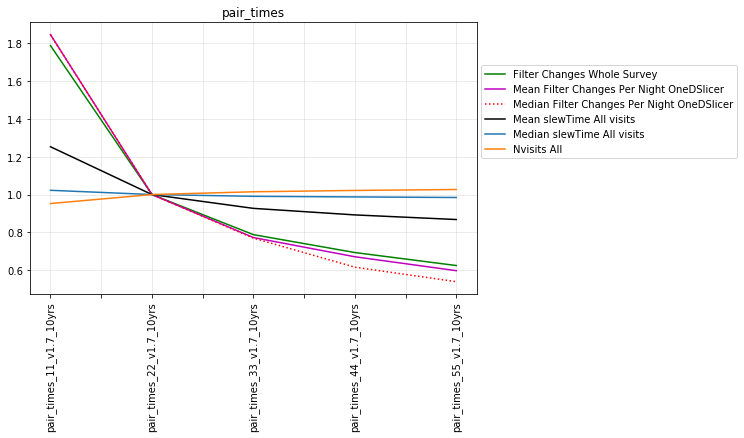

In [11]:
# And even normalize them by the reference run and plot them! 

normdf = d[metrics]/d[metrics].loc[families.family_baseline[key]]
normdf.plot(figsize=(8, 5), style=['g-', 'm-', 'r:', 'k-'])
plt.legend(loc=(1.01, 0.5))
plt.xticks(rotation='vertical')
plt.grid(True, alpha=0.3)
plt.title(f"{key}")